# Generate figures for publication
_[work in progress]_

##  Tactile stimulation examples

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from neuroprocessing.imagingtrials import ImagingTrialLoader
from skimage import io
from skimage.exposure import rescale_intensity
from skimage.filters import gaussian
from skimage.util import montage

os.makedirs('figs', exist_ok=True)
def plot_STA_img_and_dff(imaging_trial,
                         trial_ROI,
                         show_montage = True,
                         flipLR = True,
                         bleach_subtract = True,
                         tiff_out = None,
                         **dff_plot_kwargs):
    """
    Generate a montage or max projection image of the stimulus-triggered average (STA) of the 
    imaging trial, along with the DF/F trace of the trial.
    """
    mask = imaging_trial.load_mask()
    _, t, dff = imaging_trial.get_sta_stack(1, 5, .5, trial_ROI)
    sta_df, _, _ = imaging_trial.get_sta_stack(1, 5, .5)

    # remove linear trend from dff (remnants of bleaching)
    # only fit first and last 3 elements
    if bleach_subtract:
        dff = dff - np.polyval(np.polyfit(np.array([t[:3], t[-3:]]).flatten(),
                                        np.array([dff[:3], dff[-3:]]).flatten(), 1),
                                        t)

    # avreage over trials
    sta_df = sta_df.mean(axis=0)

    # add xy blur to sta_df image
    sta_df = gaussian(sta_df, sigma=2, channel_axis=0)

    # rescale to (0, 1), ignoring masked out areas
    sta_df = rescale_intensity(sta_df,
                               in_range=(sta_df[sta_df>0].min(), sta_df.max()),
                               out_range=(0, 1),
                               )

    # set everything outside the mask to 0
    sta_df = sta_df * mask

    if flipLR:
        sta_df = np.flip(sta_df, axis=2)

    if show_montage:
        f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
        img = axs[0].imshow(montage(sta_df,
                        fill = 0,
                        padding_width = 20,
                        rescale_intensity=True,
                        grid_shape= None,
                        ),
                    cmap='inferno',
                    aspect='auto',
                    )

    else:
        # max projection over time
        sta_df_max = sta_df.max(axis=0)

        f, axs = plt.subplots(1, 2, figsize=(5, 3))
        img = axs[0].imshow(sta_df_max, cmap='inferno', aspect='auto')
    
    # add colorbar
    cbar = f.colorbar(mappable = img,
                        ax=axs,
                        location = 'bottom',
                        orientation = 'horizontal',
                        shrink=0.3,
                        fraction = 0.05,
                        anchor = (0,-4) if show_montage else (0,0),
                        pad=0.01,
                        label='dF/F (norm.)',
                        )
        


    if tiff_out is not None:
        io.imsave(tiff_out, (sta_df*255).astype(np.uint8))

    axs[0].axis('off')
    axs[1].plot(t, dff)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('dF/F')
    axs[1].set(**dff_plot_kwargs)

    f.suptitle(imaging_trial)
    plt.tight_layout()


# Define ROIs for the LHL and RHL in the somatosensory cortex (SSC)
# note: this is defined in non-flipped coordinates!

ssc_LHL_roi = {
    "center": (125,175),  # (x, y)
    "width": 80,
    "height": 80
}
ssc_RHL_roi = {
    "center": (265,175),  # (x, y)
    "width": 80,
    "height": 80
}

ssc_LHL_lido_roi = {
    "center": (175,225),  # (x, y)
    "width": 60,
    "height": 60
}

ssc_RFL_roi = {
    "center": (335,210),  # (x, y)
    "width": 50,
    "height": 50
}


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### RHL example trial

Initialized with 91 trials.
Filtered to 1 trials.
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-02-29/Zyla_5min_RHLstim_2son4soff_1pt25pctISO_1/mask_processed_Zyla_5min_RHLstim_2son4soff_1pt25pctISO_1.npy
Frames pre-stim: 5, Frames post-stim: 25
Frames pre-stim: 5, Frames post-stim: 25


/var/folders/zl/xwxf2dnn3tb1fb4jpx_lvlxc0000gn/T/ipykernel_5306/2151496644.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


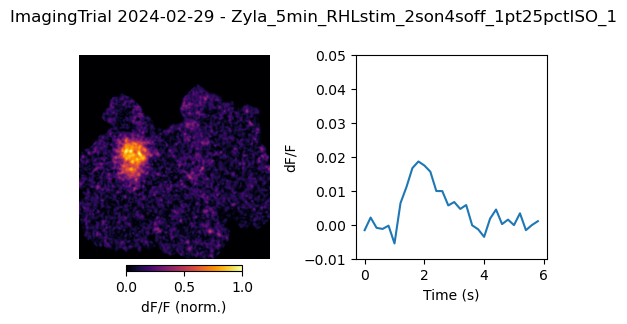

In [2]:
imaging_trials = ImagingTrialLoader('/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections')
imaging_trials.filter(exp_dir='2024-02-29',# "2024-03-19",
                      limb='RHL',
                      rec_time='5min',
                     )
trial = imaging_trials.trials[0]

plot_STA_img_and_dff(trial,
                     ssc_RHL_roi,
                     show_montage=False,
                     flipLR=True,
                     bleach_subtract=True,
                     tiff_out = 'figs/STA_RHL.tif',
                     ylim=[-0.01, 0.05])


### LHL example trial

Initialized with 91 trials.
Filtered to 1 trials.
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-02-29/Zyla_5min_LHLstim_2son4soff_1pt25pctISO_2/mask_processed_Zyla_5min_LHLstim_2son4soff_1pt25pctISO_2.npy
Frames pre-stim: 5, Frames post-stim: 25
Frames pre-stim: 5, Frames post-stim: 25


/var/folders/zl/xwxf2dnn3tb1fb4jpx_lvlxc0000gn/T/ipykernel_5306/2151496644.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


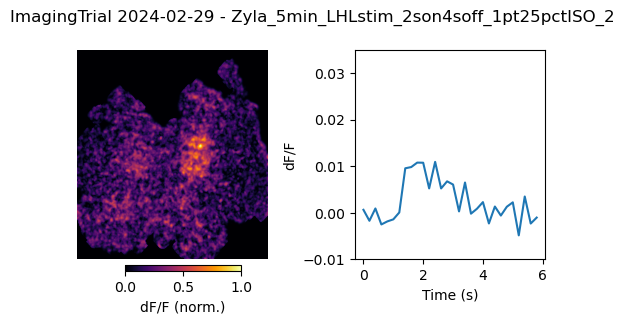

In [3]:
imaging_trials = ImagingTrialLoader('/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections')
imaging_trials.filter(exp_dir='2024-02-29',
                      limb='LHL',
                      rec_time='5min',
                      remainder='.*pt25pctISO_2'
                     )
trial = imaging_trials.trials[0]

plot_STA_img_and_dff(trial,
                     ssc_LHL_roi,
                     show_montage=False,
                     flipLR=True,
                     bleach_subtract=True,
                     tiff_out = 'figs/STA_LHL.tif',
                     ylim=[-0.01, 0.035]
                     )

### RFL example trial

Initialized with 91 trials.
Filtered to 1 trials.
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-02-21/Zyla_5min_RFLstim_2son4soff_1pt25pctISO_deeper_2/mask_processed_Zyla_5min_RFLstim_2son4soff_1pt25pctISO_deeper_2.npy
Frames pre-stim: 4, Frames post-stim: 24
Frames pre-stim: 4, Frames post-stim: 24


/var/folders/zl/xwxf2dnn3tb1fb4jpx_lvlxc0000gn/T/ipykernel_5306/2151496644.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


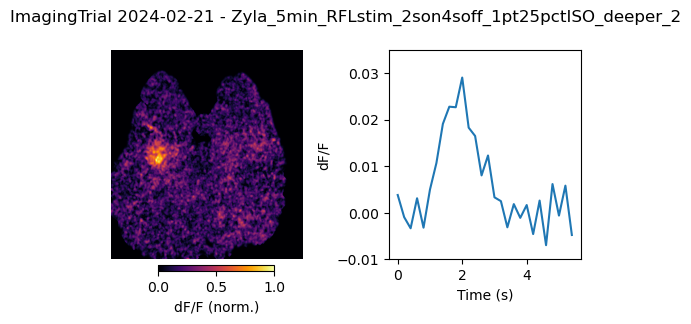

In [4]:
imaging_trials = ImagingTrialLoader('/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections')
imaging_trials.filter(exp_dir='2024-02-21',
                      limb='RFL',
                      rec_time='5min',
                     )
trial = imaging_trials.trials[0]

plot_STA_img_and_dff(trial,
                     ssc_RFL_roi,
                     show_montage=False,
                     flipLR=True,
                     bleach_subtract=True,
                     tiff_out = 'figs/STA_RFL.tif',
                     ylim=[-0.01, 0.035]
                     )

# Lidocaine results
 * Tactile stimulation before and after localized lidocaine administration with saline as control

Initialized with 91 trials.
Filtered to 4 trials.
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-02-21/Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_1/mask_processed_Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_1.npy
Frames pre-stim: 4, Frames post-stim: 24
Frames pre-stim: 4, Frames post-stim: 24


/var/folders/zl/xwxf2dnn3tb1fb4jpx_lvlxc0000gn/T/ipykernel_5306/2151496644.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-02-21/Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_postlidocaine_2/mask_processed_Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_postlidocaine_2.npy
Frames pre-stim: 4, Frames post-stim: 24
Frames pre-stim: 4, Frames post-stim: 24
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-02-21/Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_postsaline_1/mask_processed_Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_postsaline_1.npy
Frames pre-stim: 4, Frames post-stim: 24
Frames pre-stim: 4, Frames post-stim: 24


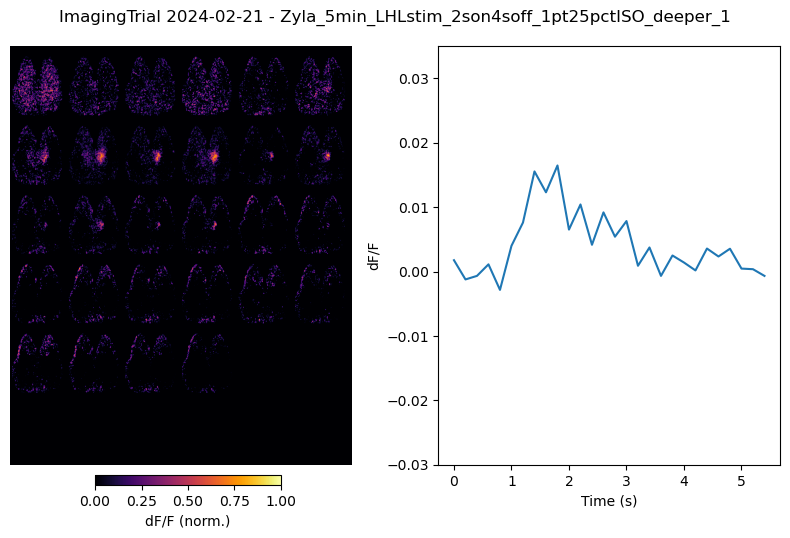

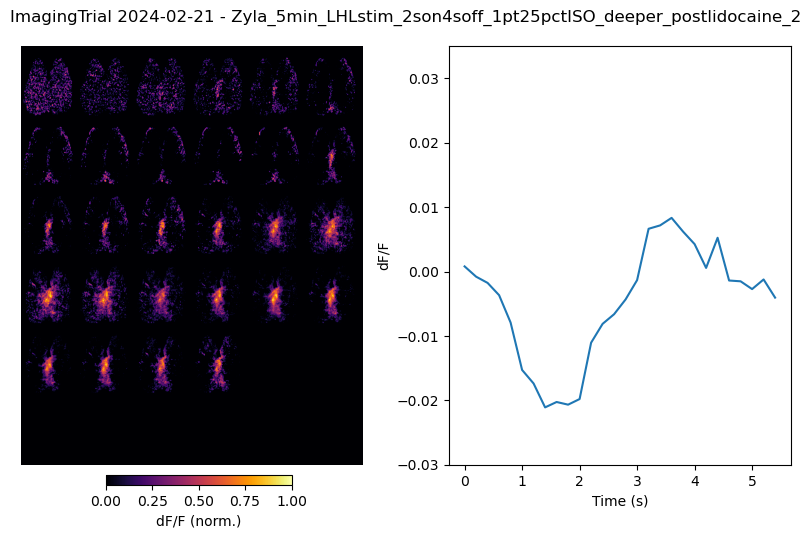

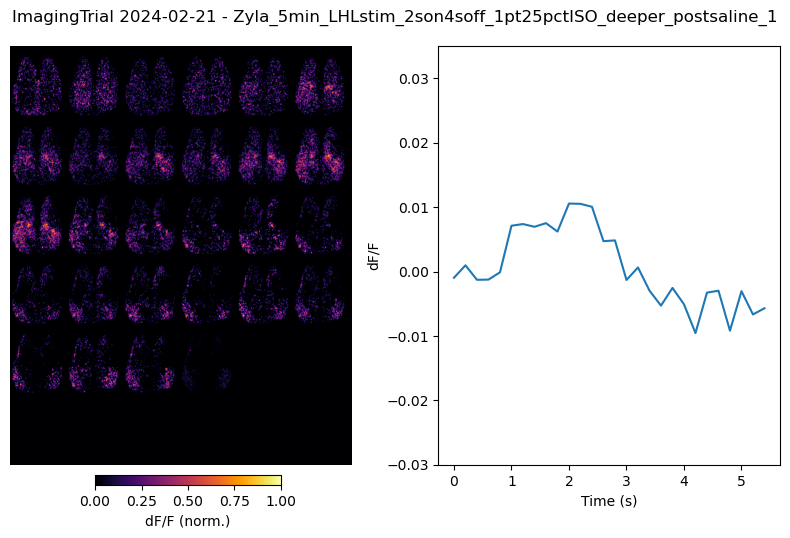

In [5]:
imaging_trials = ImagingTrialLoader('/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections')
imaging_trials.filter(exp_dir='2024-02-21',
                      limb='LHL',
                      rec_time='5min',
                     )


trial_pre = [t for t in imaging_trials if 'Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_1' in str(t)][0]
trial_post = [t for t in imaging_trials if 'Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_postlidocaine_2' in str(t)][0]
trial_sal = [t for t in imaging_trials if 'Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_postsaline_1' in str(t)][0]

plot_STA_img_and_dff(trial_pre,
                    ssc_LHL_lido_roi,
                    show_montage=True,
                    bleach_subtract=True,
                    tiff_out = 'figs/lido_initial.tif',
                    ylim=[-0.03, 0.035]
                    )
plot_STA_img_and_dff(trial_post,
                    ssc_LHL_lido_roi,
                    show_montage=True,
                    bleach_subtract=False,
                    tiff_out = 'figs/lido_lido.tif',
                    ylim=[-0.03, 0.035]
                    )
plot_STA_img_and_dff(trial_sal,
                    ssc_LHL_lido_roi,
                    show_montage=True,
                    bleach_subtract=False,
                    tiff_out = 'figs/lido_saline.tif',
                    ylim=[-0.03, 0.035]
                    )


### Breathing rate of lidocaine-related trials

Need to load raw videos from S3FS (make sure it is mounted first)

 * Initial trial is `s3fs://Videos/2024-02-21/Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_1`
 * Saline trial is `s3fs://Videos/2024-02-21/Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_postsaline_1`
 * Lidocaine trial is `s3fs://Videos/2024-02-21/Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_postlidocaine_2`

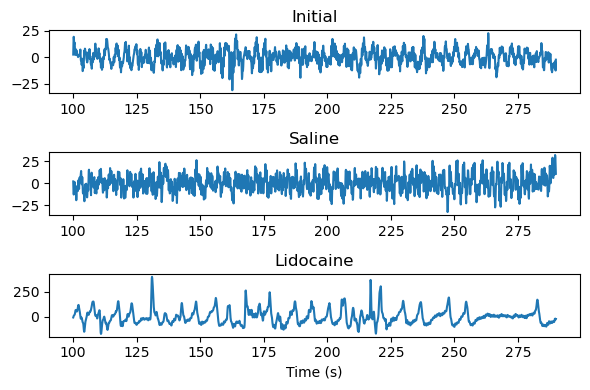

In [6]:
from pathlib import Path

from scipy.signal import butter, filtfilt
from skimage import io

base_dir = '/Users/ilya_arcadia/arcadia-neuroimaging-pruritogens'
trial_paths = {'Initial': Path(base_dir) / 'Videos/2024-02-21/Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_1',
               'Saline': Path(base_dir) / 'Videos/2024-02-21/Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_postsaline_1',
               'Lidocaine': Path(base_dir) / 'Videos/2024-02-21/Zyla_5min_LHLstim_2son4soff_1pt25pctISO_deeper_postlidocaine_2',
              }

fs = 10
frame_start = 1000
frame_end = 2900
t_vec = np.arange(frame_start, frame_end) / fs
min_breathing_freq, max_breathing_freq = 0.5, 2 # frequency range to look for breathing rate (Hz)

f,axs = plt.subplots(nrows=len(trial_paths), ncols=1, figsize=(6,4))
for t,ax in zip(trial_paths, axs):
    img = io.imread(list(trial_paths[t].glob('*.tif'))[0])
    center = np.array(img.shape) // 2
    roi = img[frame_start:frame_end,center[1]-50:center[1]+50, center[2]-50:center[2]+50]
    roi_mean = np.mean(roi, axis=(1,2))
    # high pass filter signal to remove low frequency drift
    b, a = butter(1, [0.1, 2], 'bandpass', fs = fs)
    signal_hp = filtfilt(b, a, roi_mean)
    ax.plot(t_vec, signal_hp)
    ax.set_title(t)
axs[-1].set_xlabel('Time (s)')
plt.tight_layout()


# Injection analysis
 * Stimulation always happens at t=60 seconds

## Capsaicin trials


In [7]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.exposure import rescale_intensity
import numpy as np

INJECTION_TIME = 30
def plot_montage_and_trace_pairs(imaging_trials,
                                 colors,
                                 montage_grid_shape = None,
                                 trace_roi = None,
                                 trace_ylim = None,
                                 trace_xlim = None,
                                 tiff_out = None,
                                 ):
    """
    Plot montages and traces for a list of ImagingTrials. Optionally save the montage stack as tiff.
    """
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,5),
                            gridspec_kw={'height_ratios': [3, 1],
                                         'width_ratios': [1,1],
                                         'wspace' : .1,
                                         'hspace' : .05,
                                         }
                            )
    montage_stacks = []
    for trial,ax, line_color in zip(imaging_trials, axs.T, colors, strict=True):
        # montage plot
        montage_stack = trial.plot_montage(s_start = 0,
                           s_end = 1200,
                           s_step = 30,
                           montage_grid_shape = montage_grid_shape,
                           ax=ax[0],
                           cmap='inferno',
                           aspect='auto')
        ax[0].axis('off')

        # df/f plot
        t, f = trial.load_trace(roi = trace_roi)
        t0 = np.where(t >= 0)[0][0]
        f0 = f[t0-10:t0].mean()
        dff = (f - f0) / f0

        dff = dff - np.polyval(np.polyfit(t, dff, 1), t)

        ax[1].plot(t, dff, color=line_color)

        # shade approximate injection time
        ax[1].axvspan(xmin=-INJECTION_TIME,
                      xmax=0,
                      color='gray',
                      alpha=0.5,
                      )

        ax[1].set_xlim(trace_xlim)
        ax[1].set_ylim(trace_ylim)

        montage_stacks.append(montage_stack)
    axs[1,1].set_yticklabels([])
    axs[1,0].set_ylabel('dF/F')

    # add colorbar
    cbar = fig.colorbar(mappable = axs[0,0].get_images()[0],
                        ax=axs,
                        location = 'right',
                        orientation = 'vertical',
                        shrink=0.5,
                        fraction = 0.05,
                        anchor = (0,1),
                        panchor = (0,1),
                        pad=0.01,
                        label='dF/F (norm.)',
                        )

    if tiff_out is not None:
        # rescale to max and min of montages in montage_stacks
        montage_stacks_np = np.vstack(montage_stacks)
        min_val, max_val = montage_stacks_np.min(), montage_stacks_np.max()
        montage_stacks = [rescale_intensity(m,
                                          in_range=(min_val, max_val),
                                          out_range=(0, 2**8-1),
                                          ) for m in montage_stacks]
        for trial, montage in zip(imaging_trials, montage_stacks, strict=True):
            io.imsave(tiff_out + str(trial) + '.tif', montage.astype(np.uint8))

COLOR_SALINE = '#336699'
COLOR_HIST = '#33CC99'
COLOR_CAPSAICIN = '#FF3333'


### Different limbs trial (2024-03-19)

Initialized with 91 trials.
Filtered to 2 trials.
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-03-19/Zyla_15min_LHL_carrierinj_1pt5pctISO_1_1/mask_processed_Zyla_15min_LHL_carrierinj_1pt5pctISO_1_1.npy
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-03-19/Zyla_30min_RHL_40ugin10uL_1pt5pctISO_1_1/mask_processed_Zyla_30min_RHL_40ugin10uL_1pt5pctISO_1_1.npy


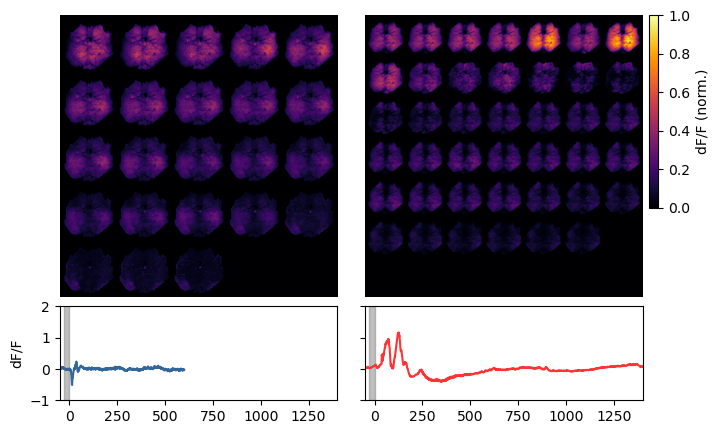

In [8]:
from neuroprocessing.imagingtrials import ImagingTrialLoader

# in this experiment, LHL was injected with vehicle, RHL with capsicin
inj_trials = ImagingTrialLoader('/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections')
inj_trials.filter(exp_dir='2024-03-19',
                  limb='(L|R)HL$',
                 )
plot_montage_and_trace_pairs(inj_trials,
                             [COLOR_SALINE, COLOR_CAPSAICIN],
                             montage_grid_shape = None,
                             trace_ylim = [-1,2],
                             trace_xlim = [-50, 1400],
                             tiff_out = 'figs/diff_limbs_'
                             )


### Same limb trial (2024-03-20)

Initialized with 91 trials.
Filtered to 2 trials.
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-03-18/Zyla_15min_LHL_carrierinj_1pt25pctISO_1/mask_processed_Zyla_15min_LHL_carrierinj_1pt25pctISO_1.npy
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-03-18/Zyla_30min_LHL_capsacirinj_1pt25pctISO_1/mask_processed_Zyla_30min_LHL_capsacirinj_1pt25pctISO_1.npy


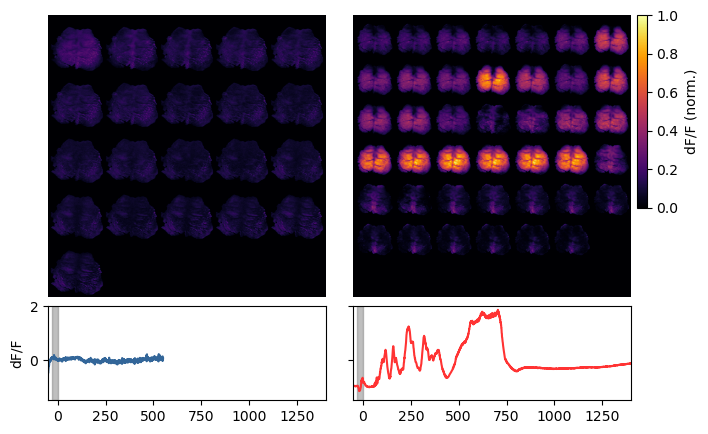

In [9]:
# in this experiment, both injections were done in LHL
inj_trials = ImagingTrialLoader('/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections')
inj_trials.filter(exp_dir='2024-03-18',# "2024-03-19",
                  limb='LHL',
                  injection_type='.*inj'
                 )

plot_montage_and_trace_pairs(inj_trials,
                             [COLOR_SALINE, COLOR_CAPSAICIN],
                             montage_grid_shape = None,
                             trace_ylim = [-1.5,2],
                             trace_xlim = [-50, 1400],
                             tiff_out = 'figs/same_limb_'
                             )


### Nape trial

Initialized with 91 trials.
Filtered to 2 trials.
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-03-18/Zyla_15min_nape_carrierinj_1pt25pctISO_1/mask_processed_Zyla_15min_nape_carrierinj_1pt25pctISO_1.npy
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-03-18/Zyla_30min_nape_40ugin10uLcapsacininj_1pt25pctISO_1/mask_processed_Zyla_30min_nape_40ugin10uLcapsacininj_1pt25pctISO_1.npy


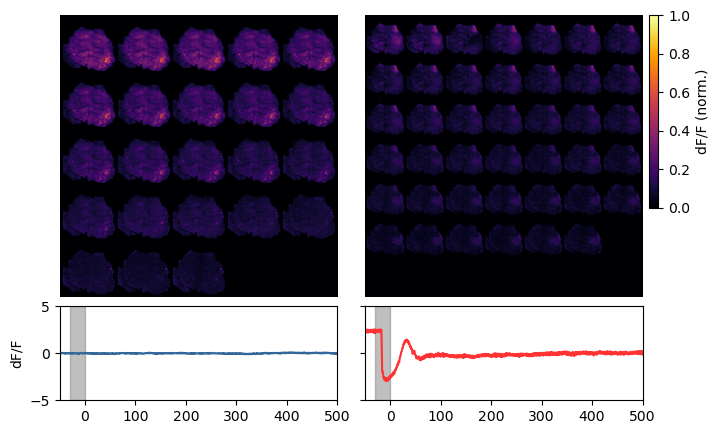

In [10]:
# in this experiment, both injections were done in LHL
inj_trials = ImagingTrialLoader('/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections')
inj_trials.filter(exp_dir='2024-03-18',# "2024-03-19",
                  limb='nape',
                  injection_type='.*inj'
                 )

nape_roi = {
    "center": (288,266),  # (x, y)
    "width": 50,
    "height": 50
}

# reverse order to plot saline first
inj_trials = inj_trials[-1::-1]
plot_montage_and_trace_pairs(inj_trials,
                             [COLOR_SALINE, COLOR_CAPSAICIN],
                             montage_grid_shape = None,
                             trace_ylim = [-5,5],
                             trace_xlim = [-50, 500],
                             trace_roi = nape_roi,
                             tiff_out = 'figs/nape_',
                             )


## Histamine trials

### RHL trial (2024-02-29)

Initialized with 91 trials.
Filtered to 2 trials.
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-02-29/Zyla_15min_RHL_salineinj_wpushbutton_1/mask_processed_Zyla_15min_RHL_salineinj_wpushbutton_1.npy
Frame start: 0, Frame end: 1496, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-02-29/Zyla_30min_RHL_50uL27MMHistinj_wpushbutton_1/mask_processed_Zyla_30min_RHL_50uL27MMHistinj_wpushbutton_1.npy


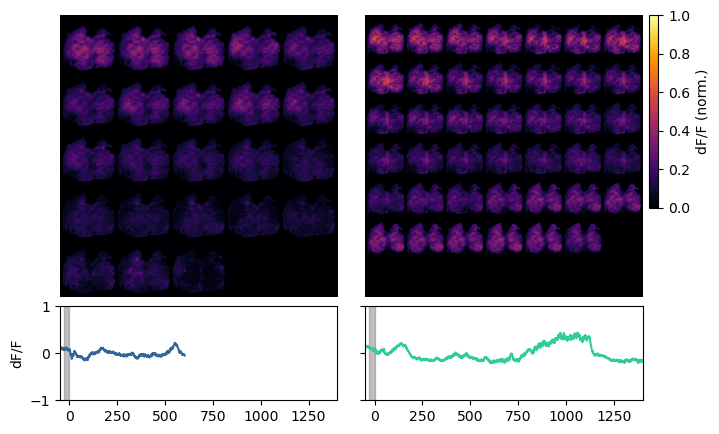

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from neuroprocessing.imagingtrials import ImagingTrialLoader

# in this experiment, both injections were done in RHL
inj_trials = ImagingTrialLoader('/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections')
inj_trials.filter(exp_dir='2024-02-29',# "2024-03-19",
                  limb='RHL$',
                  injection_type='.*inj'
                )

plot_montage_and_trace_pairs(inj_trials,
                             [COLOR_SALINE, COLOR_HIST],
                             montage_grid_shape = None,
                             trace_ylim = [-1,1],
                             trace_xlim = [-50, 1400],
                             tiff_out = 'figs/hist_rhl20240229_',
                             )

### LHL trial (2024-02-29)

Initialized with 91 trials.
Filtered to 2 trials.
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-02-29/Zyla_15min_LHL_salineinj_withpushbutton_1/mask_processed_Zyla_15min_LHL_salineinj_withpushbutton_1.npy
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-02-29/Zyla_30min_LHL_50uL27MMHistinj_withpushbutton_1/mask_processed_Zyla_30min_LHL_50uL27MMHistinj_withpushbutton_1.npy


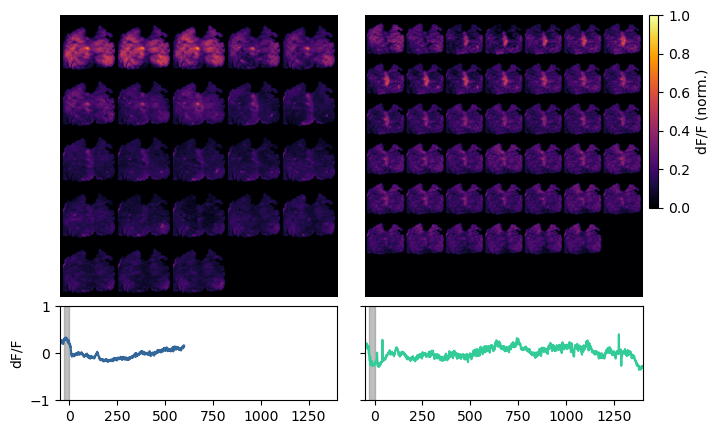

In [12]:
# in this experiment, both injections were done in RHL
inj_trials = ImagingTrialLoader('/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections')
inj_trials.filter(exp_dir='2024-02-29',# "2024-03-19",
                  limb='LHL$',
                  injection_type='.*inj'
                )

# reverse order to plot vehicle first
inj_trials = inj_trials[-1::-1]
plot_montage_and_trace_pairs(inj_trials,
                             [COLOR_SALINE, COLOR_HIST],
                             montage_grid_shape = None,
                             trace_ylim = [-1,1],
                             trace_xlim = [-50, 1400],
                             tiff_out = 'figs/hist_lhl20240229_',
                             )

### RHL trial (2024-03-06)

Initialized with 91 trials.
Filtered to 2 trials.
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-03-06/Zyla_15min_RHL_salineinj_1pt25pctISO_1/mask_processed_Zyla_15min_RHL_salineinj_1pt25pctISO_1.npy
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-03-06/Zyla_30min_RHL_27mMhistinj_1pt25pctISO_1/mask_processed_Zyla_30min_RHL_27mMhistinj_1pt25pctISO_1.npy


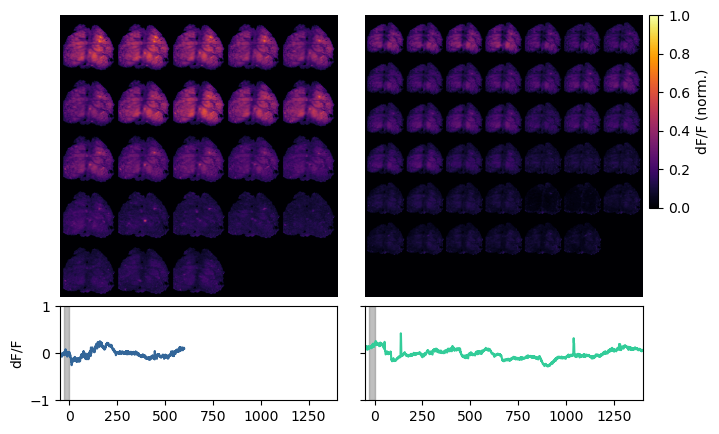

In [13]:
# in this experiment, both injections were done in RHL
inj_trials = ImagingTrialLoader('/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections')
inj_trials.filter(exp_dir='2024-03-06',# "2024-03-19",
                  limb='RHL$',
                  injection_type='.*inj'
                 )

# reverse order to plot vehicle first
inj_trials = inj_trials[-1::-1]
plot_montage_and_trace_pairs(inj_trials,
                             [COLOR_SALINE, COLOR_HIST],
                             montage_grid_shape = None,
                             trace_ylim = [-1,1],
                             trace_xlim = [-50, 1400],
                             tiff_out = 'figs/hist_rhl20240306_',
                             )

### LHL trial (2024-03-06)

Initialized with 91 trials.
Filtered to 2 trials.
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-03-06/Zyla_15min_LHL_salineinj_1pt75pctISO_1/mask_processed_Zyla_15min_LHL_salineinj_1pt75pctISO_1.npy
Frame start: 0, Frame end: 1500, Frame step: 37, N frames: 40
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-03-06/Zyla_30min_LHL_27mMhistinj_1pt75pctISO_1/mask_processed_Zyla_30min_LHL_27mMhistinj_1pt75pctISO_1.npy


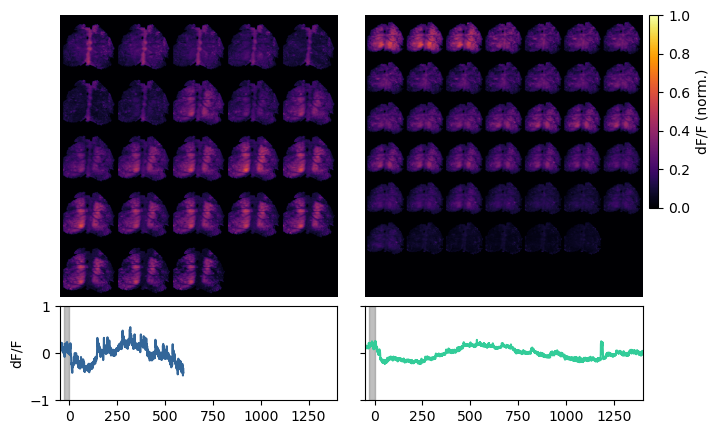

In [14]:
# in this experiment, both injections were done in RHL
inj_trials = ImagingTrialLoader('/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections')
inj_trials.filter(exp_dir='2024-03-06',# "2024-03-19",
                  limb='LHL$',
                  injection_type='.*inj'
                )

plot_montage_and_trace_pairs(inj_trials,
                             [COLOR_SALINE, COLOR_HIST],
                             montage_grid_shape = None,
                             trace_ylim = [-1,1],
                             trace_xlim = [-50, 1400],
                             tiff_out = 'figs/hist_lhl20240306_',
                             )